In [1]:
"""
US Homelessness Data Analysis - Jupyter Notebook Version
========================================================
This script analyzes homelessness data across US states and territories.
Run each cell in order to build up the analysis step by step.
"""

'\nUS Homelessness Data Analysis - Jupyter Notebook Version\n========================================================\nThis script analyzes homelessness data across US states and territories.\nRun each cell in order to build up the analysis step by step.\n'

In [2]:
# =============================================================================
# CELL 1: IMPORTS AND SETUP
# =============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Install required package (uncomment if needed)
# !pip install pyxlsb

print("Imports successful!")

Imports successful!


In [3]:
# =============================================================================
# CELL 2: LOAD DATA
# =============================================================================

# Define the path to your downloaded .xlsb file
xlsb_file_path = '----'



In [51]:
# Load the data
df = pd.read_excel(xlsb_file_path)
print("Excel file loaded successfully!")
print(f"Dataset shape: {df.shape}")

# Display basic info
print("\nFirst few rows:")
print(df.head())

Excel file loaded successfully!
Dataset shape: (60, 1306)

First few rows:
  State  Number of CoCs Overall Homeless Overall Homeless - Under 18  \
0    AK             2.0             2686                         443   
1    AL             9.0             4601                         761   
2    AR             5.0             2783                         328   
3    AS             0.0                                                
4    AZ             3.0            14737                        1904   

  Overall Homeless - Age 18 to 24 Overall Homeless - Over 24  \
0                             228                       2015   
1                             276                       3564   
2                             225                       2230   
3                                                              
4                            1017                      11816   

  Overall Homeless - Age 25 to 34 Overall Homeless - Age 35 to 44  \
0                             495     

In [5]:
# =============================================================================
# CELL 3: EXPLORE DATA
# =============================================================================

print("Dataset info:")
df.info()
print("\nBasic statistics:")
print(df.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 1306 entries, State to Unsheltered Homeless Children of Parenting Youth
dtypes: float64(2), object(1304)
memory usage: 612.3+ KB

Basic statistics:
       Number of CoCs  \
count       57.000000   
mean        13.526316   
std         50.709292   
min          0.000000   
25%          2.000000   
50%          4.000000   
75%         10.000000   
max        385.000000   

       Overall Homeless Unaccompanied Youth (Under 25) - Non-Hispanic/Latina/e/o  
count                                          55.000000                          
mean                                          934.618182                          
std                                          3509.247759                          
min                                             3.000000                          
25%                                           116.000000                          
50%                                

In [6]:
# =============================================================================
# CELL 4: CLEAN DATA
# =============================================================================

# Filter out rows where 'Overall Homeless' cannot be converted to numeric
df_filtered = df[pd.to_numeric(df['Overall Homeless'], errors='coerce').notna()]
print(f"After filtering numeric values: {df_filtered.shape}")


After filtering numeric values: (55, 1306)


In [7]:
# Remove 'Total' row and keep only state/territory abbreviations (2 characters)
df_cleaned = df_filtered[
    (df_filtered['State'].str.len() == 2) &
    (df_filtered['State'] != 'Total') &
    (df_filtered['State'] != 'nan')
].copy()


In [8]:
# Ensure proper data types
df_cleaned['State'] = df_cleaned['State'].astype(str).str.strip()
df_cleaned['Overall Homeless'] = pd.to_numeric(df_cleaned['Overall Homeless'], errors='coerce')


In [9]:
# Remove any remaining NaN values in Overall Homeless
df_cleaned = df_cleaned.dropna(subset=['Overall Homeless']).copy()

print(f"After cleaning: {df_cleaned.shape}")
print("\nCleaned data sample:")
print(df_cleaned[['State', 'Overall Homeless']].head(10))

After cleaning: (54, 1306)

Cleaned data sample:
   State  Overall Homeless
0     AK              2686
1     AL              4601
2     AR              2783
4     AZ             14737
5     CA            187084
6     CO             18715
7     CT              3410
8     DC              5616
9     DE              1358
10    FL             31362


In [10]:
# =============================================================================
# CELL 5: POPULATION DATA
# =============================================================================

# Create population data for US states and territories (2024 estimates)
population_data = {
    'State': [
        'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU',
        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
        'MN', 'MS', 'MO', 'MP', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
        'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
        'VA', 'VI', 'VT', 'WA', 'WV', 'WI', 'WY', 'AS'
    ],
    'Population 2024': [
        5157699, 740133, 7582384, 3088354, 39431263, 5957493, 3675069, 1051917,
        702250, 23372215, 11180878, 172951, 1446146, 2001619, 12710158, 6924275,
        3241488, 2970606, 4588372, 4597740, 1405012, 6263220, 7136171, 10140459,
        5793151, 2943045, 6245466, 47326, 1137233, 2005465, 3267467, 1409032,
        9500851, 2130256, 19867248, 11046024, 796568, 11883304, 4095393, 4272371,
        13078751, 3203295, 1112308, 5478831, 924669, 7227750, 31290831, 3503613,
        8811195, 98774, 648493, 7958180, 1769979, 5960975, 587618, 44293
    ]
}

df_population = pd.DataFrame(population_data)
print("Population data created!")
print(f"Population data shape: {df_population.shape}")
print(df_population.head())

Population data created!
Population data shape: (56, 2)
  State  Population 2024
0    AL          5157699
1    AK           740133
2    AZ          7582384
3    AR          3088354
4    CA         39431263


In [11]:
# =============================================================================
# CELL 6: MERGE DATA
# =============================================================================

# Merge homelessness data with population data
df_merged = pd.merge(df_cleaned, df_population, on='State', how='left')
print(f"Merged data shape: {df_merged.shape}")


Merged data shape: (54, 1307)


In [12]:
# Calculate homelessness rate per 100,000 population
df_merged['Homeless Per 100K'] = (df_merged['Overall Homeless'] / df_merged['Population 2024']) * 100000
df_final = df_merged.round()

print("Final dataset with rates calculated!")
print("\nSample of final data:")
print(df_final[['State', 'Overall Homeless', 'Population 2024', 'Homeless Per 100K']].head())


Final dataset with rates calculated!

Sample of final data:
  State  Overall Homeless  Population 2024  Homeless Per 100K
0    AK              2686           740133              363.0
1    AL              4601          5157699               89.0
2    AR              2783          3088354               90.0
3    AZ             14737          7582384              194.0
4    CA            187084         39431263              474.0


In [13]:
# =============================================================================
# CELL 7: SUMMARY STATISTICS
# =============================================================================

print("=== SUMMARY STATISTICS ===")
print("\nTop 10 states by absolute homeless population:")
top_homeless = df_final.nlargest(10, 'Overall Homeless')[['State', 'Overall Homeless']]
print(top_homeless.to_string(index=False))


=== SUMMARY STATISTICS ===

Top 10 states by absolute homeless population:
State  Overall Homeless
   CA            187084
   NY            158019
   WA             31554
   FL             31362
   MA             29360
   TX             27987
   IL             25832
   OR             22875
   CO             18715
   AZ             14737


In [14]:
print("\nTop 10 states by homelessness rate (per 100K):")
top_rate = df_final.nlargest(10, 'Homeless Per 100K')[['State', 'Homeless Per 100K']]
print(top_rate.to_string(index=False))



Top 10 states by homelessness rate (per 100K):
State  Homeless Per 100K
   HI              805.0
   DC              800.0
   NY              795.0
   GU              722.0
   OR              535.0
   VT              533.0
   CA              474.0
   MA              411.0
   WA              396.0
   AK              363.0


In [15]:
print("\nBottom 10 states by homelessness rate (per 100K):")
bottom_rate = df_final.nsmallest(10, 'Homeless Per 100K')[['State', 'Homeless Per 100K']]
print(bottom_rate.to_string(index=False))


Bottom 10 states by homelessness rate (per 100K):
State  Homeless Per 100K
   MS               35.0
   PR               65.0
   LA               75.0
   IA               81.0
   VA               81.0
   SC               84.0
   WI               85.0
   WY               85.0
   AL               89.0
   TX               89.0


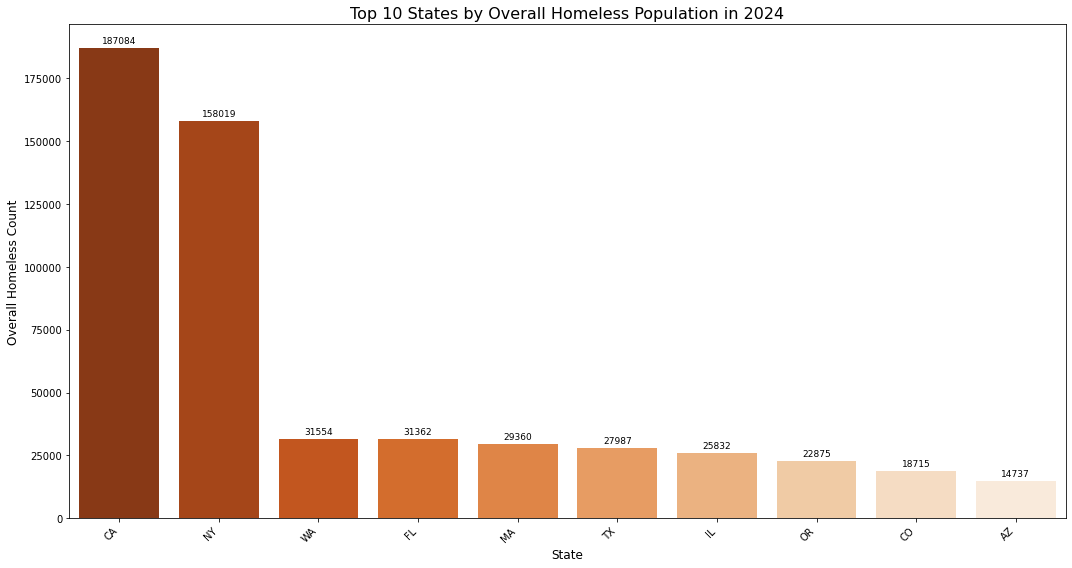

In [43]:
# =============================================================================
# CELL 8: PLOT 1 - TOP STATES BY ABSOLUTE HOMELESS POPULATION
# =============================================================================

# Top 10 states by absolute homeless population
df_top_homeless = df_final.sort_values('Overall Homeless', ascending=False).head(10)

plt.figure(figsize=(15, 8))
ax = sns.barplot(
    x='State',
    y='Overall Homeless',
    data=df_top_homeless,
    palette='Oranges_r'
)

plt.title('Top 10 States by Overall Homeless Population in 2024', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Overall Homeless Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()


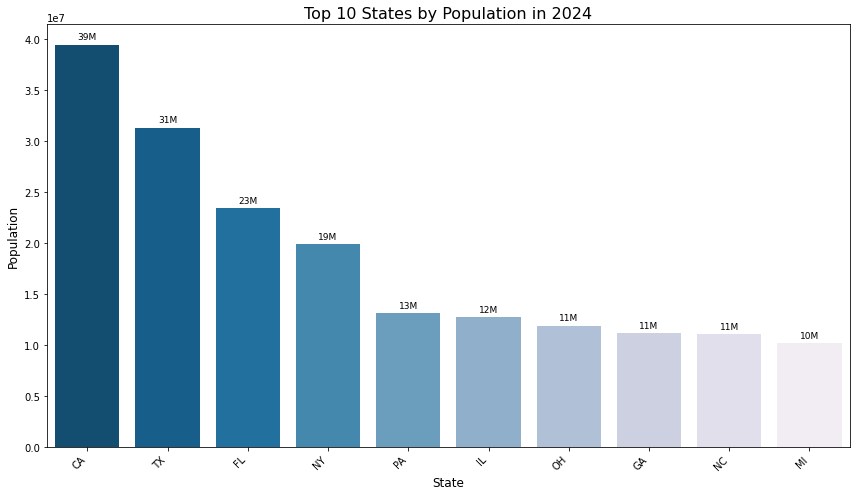

In [46]:
# =============================================================================
# CELL 9: PLOT 2 - TOP STATES BY POPULATION
# =============================================================================

# Top 10 states by population
df_top_population = df_final.sort_values('Population 2024', ascending=False).head(10)

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='State',
    y='Population 2024',
    data=df_top_population,
    palette='PuBu_r'
)

plt.title('Top 10 States by Population in 2024', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Format population labels (millions/thousands)
labels_formatted = []
for pop_val in df_top_population['Population 2024']:
    if pop_val >= 1_000_000:
        labels_formatted.append(f'{int(pop_val/1_000_000)}M')
    elif pop_val >= 1_000:
        labels_formatted.append(f'{int(pop_val/1_000)}K')
    else:
        labels_formatted.append(f'{int(pop_val)}')

for container in ax.containers:
    ax.bar_label(container, labels=labels_formatted, label_type='edge', 
                fontsize=9, padding=3)

plt.tight_layout()
plt.show()


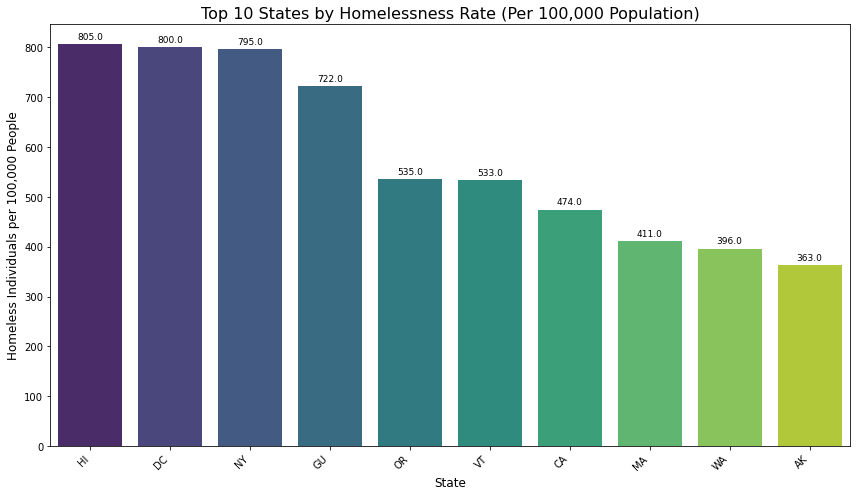

In [47]:
# =============================================================================
# CELL 10: PLOT 3 - TOP STATES BY HOMELESSNESS RATE
# =============================================================================

# Top 10 states by homelessness rate (per 100K)
df_top_rate = df_final.sort_values('Homeless Per 100K', ascending=False).head(10)

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='State',
    y='Homeless Per 100K',
    data=df_top_rate,
    palette='viridis'
)

plt.title('Top 10 States by Homelessness Rate (Per 100,000 Population)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Homeless Individuals per 100,000 People', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

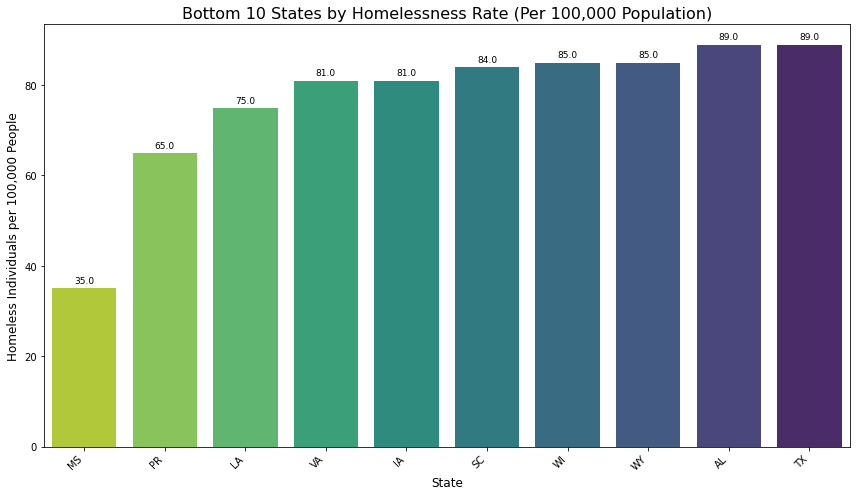

In [48]:
# =============================================================================
# CELL 11: PLOT 4 - BOTTOM STATES BY HOMELESSNESS RATE
# =============================================================================

# Bottom 10 states by homelessness rate (per 100K)
df_bottom_rate = df_final.sort_values('Homeless Per 100K', ascending=True).head(10)

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='State',
    y='Homeless Per 100K',
    data=df_bottom_rate,
    palette='viridis_r'
)

plt.title('Bottom 10 States by Homelessness Rate (Per 100,000 Population)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Homeless Individuals per 100,000 People', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()
